In [78]:
import pandas as pd
import numpy as np


df = pd.read_csv("yacht_hydrodynamics.data", sep='\s+')

In [79]:
df.head()

,-2.3,0.568,4.78,3.99,3.17,0.125,0.11
0,-2.3,0.568,4.78,3.99,3.17,0.150,0.27
1,-2.3,0.568,4.78,3.99,3.17,0.175,0.47
2,-2.3,0.568,4.78,3.99,3.17,0.200,0.78
3,-2.3,0.568,4.78,3.99,3.17,0.225,1.18
4,-2.3,0.568,4.78,3.99,3.17,0.250,1.82


In [80]:
df=df.rename(columns={"-2.3": "Longitudinal position", 
                      "0.568": "Prismatic coefficient",
                     "4.78":"Longitudinal position",
                     "3.99":" Length-displacement ratio",
                     "3.17":"Beam-draught ratio",
                     "0.125":"Length-beam ratio",
                     "0.11":"y_Froude number"})

In [81]:
df.head()

,Longitudinal position,Prismatic coefficient,Longitudinal position,Length-displacement ratio,Beam-draught ratio,Length-beam ratio,y_Froude number
0,-2.3,0.568,4.78,3.99,3.17,0.150,0.27
1,-2.3,0.568,4.78,3.99,3.17,0.175,0.47
2,-2.3,0.568,4.78,3.99,3.17,0.200,0.78
3,-2.3,0.568,4.78,3.99,3.17,0.225,1.18
4,-2.3,0.568,4.78,3.99,3.17,0.250,1.82


In [82]:
X=np.ones((len(df), len(df.columns)))
X[:,1:len(df.columns)-1]

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       ...,
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [83]:
A=df.drop('y_Froude number', axis=1)

In [84]:
X[:,1:len(df.columns)]=A.values
X

array([[ 1.   , -2.3  ,  0.568, ...,  3.99 ,  3.17 ,  0.15 ],
       [ 1.   , -2.3  ,  0.568, ...,  3.99 ,  3.17 ,  0.175],
       [ 1.   , -2.3  ,  0.568, ...,  3.99 ,  3.17 ,  0.2  ],
       ...,
       [ 1.   , -2.3  ,  0.6  , ...,  4.23 ,  2.73 ,  0.4  ],
       [ 1.   , -2.3  ,  0.6  , ...,  4.23 ,  2.73 ,  0.425],
       [ 1.   , -2.3  ,  0.6  , ...,  4.23 ,  2.73 ,  0.45 ]])

In [85]:
df.describe

<bound method NDFrame.describe of      Longitudinal position  Prismatic coefficient  Longitudinal position  \
0                     -2.3                  0.568                   4.78   
1                     -2.3                  0.568                   4.78   
2                     -2.3                  0.568                   4.78   
3                     -2.3                  0.568                   4.78   
4                     -2.3                  0.568                   4.78   
..                     ...                    ...                    ...   
302                   -2.3                  0.600                   4.34   
303                   -2.3                  0.600                   4.34   
304                   -2.3                  0.600                   4.34   
305                   -2.3                  0.600                   4.34   
306                   -2.3                  0.600                   4.34   

      Length-displacement ratio  Beam-draught ratio  

In [86]:
Y=df['y_Froude number'].values
np.transpose(Y).shape
X.shape


(307, 7)

In [87]:
#b = (XT X)−1 XT Y 
C=np.transpose(X).dot(X)
D=np.linalg.inv(C)
E=np.transpose(X).dot(Y)

In [88]:
b=D.dot(E)
b

array([-18.67854471,   0.19244624,  -7.74053243,   3.81244869,
        -1.60436677,  -4.08289562, 122.15996183])

In [89]:
SCR_mat=Y-X.dot(b)


In [90]:
np.sum(np.square(SCR_mat), axis=0 )/(len(SCR_mat))

78.41673921747213

In [91]:
import seaborn as sn
import matplotlib.pyplot as plt

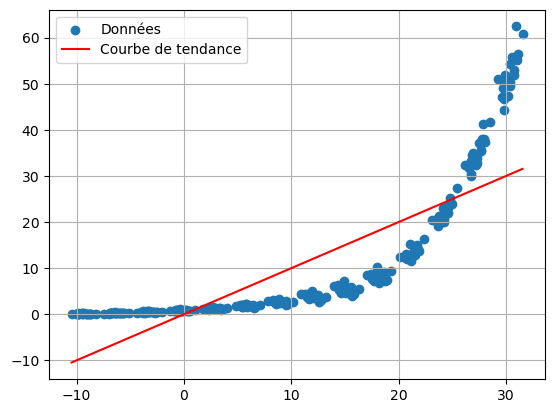

In [92]:
plt.scatter(X.dot(b),Y, label='Données')
# Ajuster une régression linéaire (polynôme de degré 1)
coefficients = np.polyfit(X.dot(b), Y, 1)
# a est la pente, b est l'ordonnée à l'origine
a, d = coefficients  
tendance_x = np.linspace(min(X.dot(b)), max(X.dot(b)), 100)
tendance_y = a * tendance_x + d
plt.plot(tendance_x, tendance_y, label='Courbe de tendance', color='red')

plt.legend()
plt.grid(True)

In [93]:
np.array(Y).shape

(307,)

In [94]:
#module Sklearn pour faire la r´egression lin´eaire
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [95]:
#Préparez les données et ne pas oublié de reshape en (307,1)
x = X
y = Y

In [96]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

In [97]:
#Créez un modèle de régression linéaire
model = LinearRegression()

In [98]:
#entrainer le modèle
model.fit(X_train, y_train)


LinearRegression()

In [99]:
y_pred = model.predict(X_test)

In [100]:
#évaluer le modèle

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R²: {r2}')


y_pred=y_pred.reshape(154,)
y_test=y_test.reshape(154,)

RMSE: 9.177877825610379
R²: 0.636074438749426


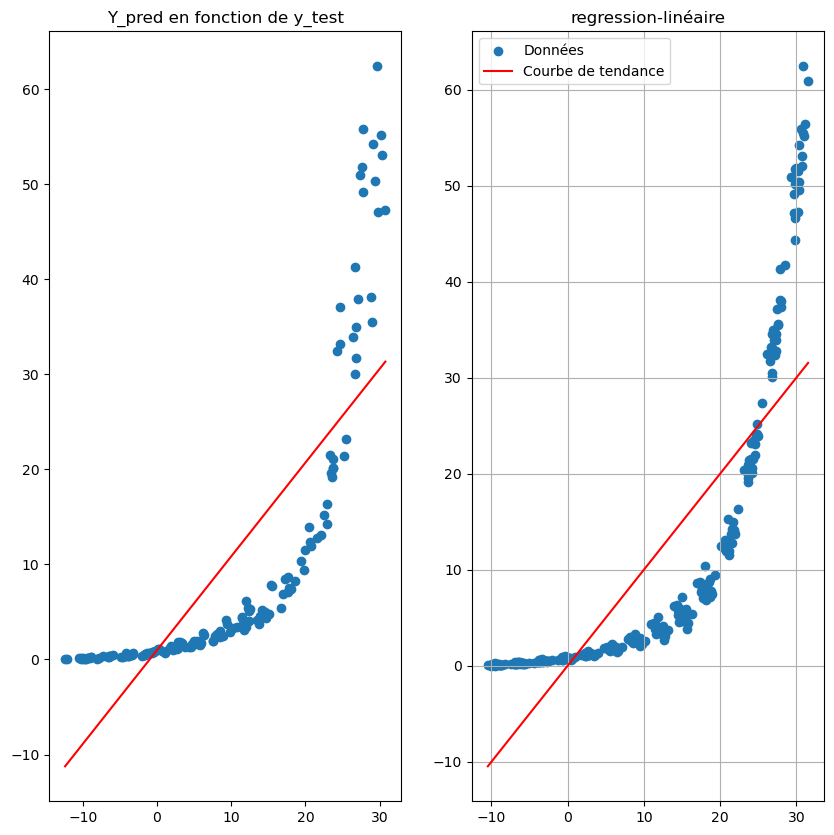

In [101]:
# division de la fenêtre graphique en 1 ligne, 3 colonnes
figure = plt.figure(figsize = (10, 10)) 

plt.figure(1)

plt.subplot(1, 2, 1)

plt.scatter(y_pred,y_test)
plt.title("Y_pred en fonction de y_test")
# Ajuster une régression linéaire (polynôme de degré 1)
coefficients = np.polyfit(y_pred, y_test, deg=1)
# a est la pente, b est l'ordonnée à l'origine
a, d = coefficients  
tendance_x = np.linspace(min(y_pred), max(y_pred), 100)
tendance_y = a * tendance_x + d
plt.plot(tendance_x, tendance_y, label='Courbe de tendance de y_pred en fonction de y_test', color='red')

plt.subplot(1, 2, 2)

plt.scatter(X.dot(b),Y, label='Données')
# Ajuster une régression linéaire (polynôme de degré 1)
coefficients = np.polyfit(X.dot(b), Y, 1)
# a est la pente, b est l'ordonnée à l'origine
a, d = coefficients  
tendance_x = np.linspace(min(X.dot(b)), max(X.dot(b)), 100)
tendance_y = a * tendance_x + d
plt.plot(tendance_x, tendance_y, label='Courbe de tendance', color='red')
plt.title("regression-linéaire")


plt.legend()
plt.grid(True)

In [102]:
#Séparer le jeu de données initial en deux sous-ensembles de donn´ees Eapp et Etest de tailles égales.
#Partie3

n=len(df)
p=len(df.columns)
Eapp=df[0:n//2]
Etest=df[(n//2) +1:n]

In [103]:
Etest

,Longitudinal position,Prismatic coefficient,Longitudinal position,Length-displacement ratio,Beam-draught ratio,Length-beam ratio,y_Froude number
154,0.0,0.565,5.10,3.94,3.51,0.150,0.26
155,0.0,0.565,5.10,3.94,3.51,0.175,0.50
156,0.0,0.565,5.10,3.94,3.51,0.200,0.83
157,0.0,0.565,5.10,3.94,3.51,0.225,1.28
158,0.0,0.565,5.10,3.94,3.51,0.250,1.90
...,...,...,...,...,...,...,...
302,-2.3,0.600,4.34,4.23,2.73,0.350,8.47
303,-2.3,0.600,4.34,4.23,2.73,0.375,12.27
304,-2.3,0.600,4.34,4.23,2.73,0.400,19.59
305,-2.3,0.600,4.34,4.23,2.73,0.425,30.48


In [104]:
Eapp

,Longitudinal position,Prismatic coefficient,Longitudinal position,Length-displacement ratio,Beam-draught ratio,Length-beam ratio,y_Froude number
0,-2.3,0.568,4.78,3.99,3.17,0.150,0.27
1,-2.3,0.568,4.78,3.99,3.17,0.175,0.47
2,-2.3,0.568,4.78,3.99,3.17,0.200,0.78
3,-2.3,0.568,4.78,3.99,3.17,0.225,1.18
4,-2.3,0.568,4.78,3.99,3.17,0.250,1.82
...,...,...,...,...,...,...,...
148,-5.0,0.565,4.77,3.99,3.15,0.350,7.87
149,-5.0,0.565,4.77,3.99,3.15,0.375,12.71
150,-5.0,0.565,4.77,3.99,3.15,0.400,21.02
151,-5.0,0.565,4.77,3.99,3.15,0.425,34.58


In [105]:
#matrices des jeux de donnée explicatifs

X_test=np.ones((n//2,p))
X_Eapp=np.ones((n//2,p))

X_test[:,1:p]=Etest.drop('y_Froude number', axis=1)
X_Eapp[:,1:p]=Etest.drop('y_Froude number', axis=1)

In [106]:
print(X_test,"\n \n  \n")
print(X_Eapp)

[[ 1.     0.     0.565 ...  3.94   3.51   0.15 ]
 [ 1.     0.     0.565 ...  3.94   3.51   0.175]
 [ 1.     0.     0.565 ...  3.94   3.51   0.2  ]
 ...
 [ 1.    -2.3    0.6   ...  4.23   2.73   0.4  ]
 [ 1.    -2.3    0.6   ...  4.23   2.73   0.425]
 [ 1.    -2.3    0.6   ...  4.23   2.73   0.45 ]] 
 
  

[[ 1.     0.     0.565 ...  3.94   3.51   0.15 ]
 [ 1.     0.     0.565 ...  3.94   3.51   0.175]
 [ 1.     0.     0.565 ...  3.94   3.51   0.2  ]
 ...
 [ 1.    -2.3    0.6   ...  4.23   2.73   0.4  ]
 [ 1.    -2.3    0.6   ...  4.23   2.73   0.425]
 [ 1.    -2.3    0.6   ...  4.23   2.73   0.45 ]]


In [107]:
#meilleur approximation avec les données de Eapp, y_pred_Eapp=X_Eapp*b_Eapp
Y_Eapp=Eapp['y_Froude number'].values

C=np.transpose(X_Eapp).dot(X_Eapp)
D=np.linalg.inv(C)
E=np.transpose(X_Eapp).dot(Y_Eapp)
b_Eapp=D.dot(E)

y_pred_Eapp=X_Eapp.dot(b_Eapp)

print("voici l'approxiamtion de la variable prédite, avec le jeux de données de Eapp:","\n",y_pred_Eapp)


voici l'approxiamtion de la variable prédite, avec le jeux de données de Eapp: 
 [-6.62843087 -3.65446861 -0.68050635  2.29345591  5.26741817  8.24138043
 11.21534269 14.18930495 17.16326721 20.13722947 23.11119173 26.08515399
 29.05911625 -9.04467386 -6.0707116  -3.09674934 -0.12278708  2.85117518
  5.82513744  8.7990997  11.77306196 14.74702422 17.72098648 20.69494874
 23.668911   26.64287326 29.61683552 -9.30367448 -6.32971222 -3.35574996
 -0.3817877   2.59217456  5.56613682  8.54009908 11.51406134 14.4880236
 17.46198586 20.43594812 23.40991038 26.38387264 29.3578349  -9.27510825
 -6.30114599 -3.32718373 -0.35322147  2.62074079  5.59470305  8.56866531
 11.54262757 14.51658983 17.49055209 20.46451435 23.4384766  26.41243886
 29.38640112 -8.97023074 -5.99626848 -3.02230622 -0.04834396  2.9256183
  5.89958056  8.87354282 11.84750508 14.82146734 17.7954296  20.76939186
 23.74335412 26.71731638 29.69127864 -9.07423891 -6.10027665 -3.12631439
 -0.15235213  2.82161013  5.79557239  8.76953

In [108]:
#Comparer les sommes des carrées des erreurs sur les ensembles Eapp et Etest

# YEapp − XEapp bEapp carré

SCR_mat=Y_Eapp-X_Eapp.dot(b_Eapp)
np.sum(np.square(SCR_mat), axis=0 )/(len(SCR_mat))

73.4426331404681

In [109]:
#YEtest−XEtest bEapp

SCR_mat=Y_test-X_test.dot(b_Eapp)
np.sum(np.square(SCR_mat), axis=0 )/(len(SCR_mat))

84.47381471568993

In [110]:
#interprétation
print("l'approximation linéaire est meilleur avec le jeu de donnée issue de la matrice Eapp.","\n")
print("Les jeux de données issus de la partie Etest est moins pertinent lorsqu'on lui donne ")
print("la solution issue du jeux de donnée de Eapp.")

l'approximation linéaire est meilleur avec le jeu de donnée issue de la matrice Eapp. 

Les jeux de données issus de la partie Etest est moins pertinent lorsqu'on lui donne 
la solution issue du jeux de donnée de Eapp.


In [111]:
#Partie4(données centrée réduites)

Eapp

,Longitudinal position,Prismatic coefficient,Longitudinal position,Length-displacement ratio,Beam-draught ratio,Length-beam ratio,y_Froude number
0,-2.3,0.568,4.78,3.99,3.17,0.150,0.27
1,-2.3,0.568,4.78,3.99,3.17,0.175,0.47
2,-2.3,0.568,4.78,3.99,3.17,0.200,0.78
3,-2.3,0.568,4.78,3.99,3.17,0.225,1.18
4,-2.3,0.568,4.78,3.99,3.17,0.250,1.82
...,...,...,...,...,...,...,...
148,-5.0,0.565,4.77,3.99,3.15,0.350,7.87
149,-5.0,0.565,4.77,3.99,3.15,0.375,12.71
150,-5.0,0.565,4.77,3.99,3.15,0.400,21.02
151,-5.0,0.565,4.77,3.99,3.15,0.425,34.58


In [130]:
#On va centrée et réduire Eapp et Etest
Eapp_cr=(Eapp-np.mean(Eapp, axis=0))/np.std(Eapp, axis=0)
Etest_cr=(Etest-np.mean(Etest, axis=0))/np.std(Etest, axis=0)

In [131]:
Eapp_cr

,Longitudinal position,Prismatic coefficient,Longitudinal position,Length-displacement ratio,Beam-draught ratio,Length-beam ratio,y_Froude number
0,0.051157,0.175095,0.078199,-0.038939,1.729677e-15,-1.382245,-0.683371
1,0.051157,0.175095,0.078199,-0.038939,1.729677e-15,-1.132854,-0.669751
2,0.051157,0.175095,0.078199,-0.038939,1.729677e-15,-0.883463,-0.648640
3,0.051157,0.175095,0.078199,-0.038939,1.729677e-15,-0.634072,-0.621399
4,0.051157,0.175095,0.078199,-0.038939,1.729677e-15,-0.384681,-0.577815
...,...,...,...,...,...,...,...
148,-2.464685,-0.162588,0.035469,-0.038939,-7.789774e-02,0.612882,-0.165809
149,-2.464685,-0.162588,0.035469,-0.038939,-7.789774e-02,0.862273,0.163797
150,-2.464685,-0.162588,0.035469,-0.038939,-7.789774e-02,1.111664,0.729710
151,-2.464685,-0.162588,0.035469,-0.038939,-7.789774e-02,1.361054,1.653150


In [132]:
Etest_cr

,Longitudinal position,Prismatic coefficient,Longitudinal position,Length-displacement ratio,Beam-draught ratio,Length-beam ratio,y_Froude number
154,1.314439,0.101348,1.069277,0.207460,1.150613,-1.382245,-0.676156
155,1.314439,0.101348,1.069277,0.207460,1.150613,-1.132854,-0.660792
156,1.314439,0.101348,1.069277,0.207460,1.150613,-0.883463,-0.639666
157,1.314439,0.101348,1.069277,0.207460,1.150613,-0.634072,-0.610858
158,1.314439,0.101348,1.069277,0.207460,1.150613,-0.384681,-0.571166
...,...,...,...,...,...,...,...
302,0.067671,1.208939,-1.768138,0.938014,-2.196879,0.612882,-0.150565
303,0.067671,1.208939,-1.768138,0.938014,-2.196879,0.862273,0.092705
304,0.067671,1.208939,-1.768138,0.938014,-2.196879,1.111664,0.561321
305,0.067671,1.208939,-1.768138,0.938014,-2.196879,1.361054,1.258482


In [137]:
#séparation des données, données explicatives
X_Etest_cr=np.ones((n//2,p))
X_Eapp_cr=np.ones((n//2,p))

X_Etest_cr[:,1:p]=Etest_cr.drop('y_Froude number', axis=1)
X_Eapp_cr[:,1:p]=Etest_cr.drop('y_Froude number', axis=1)

#séparation de la variable cible 
Y_Eapp_cr=Eapp_cr['y_Froude number'].values
Y_Etest_cr=Etest_cr['y_Froude number'].values
#calcul de la solution d'estimation des données
C=np.transpose(X_Eapp_cr).dot(X_Eapp_cr)
D=np.linalg.inv(C)
E=np.transpose(X_Eapp_cr).dot(Y_Eapp_cr)
b_Eapp_cr=D.dot(E)

#Calcul de l'erreur quadratique moyenne SCR de notre estimation pour le jeu de donnée Eapp

SCR_mat_cr_Eapp=Y_Eapp_cr-X_Eapp_cr.dot(b_Eapp_cr)
a=np.sum(np.square(SCR_mat_cr_Eapp), axis=0 )/(len(SCR_mat_cr_Eapp))
print(" le SCR de notre estimation avec le jeu de donnée Eapp est:",a,"\n")


 le SCR de notre estimation avec le jeu de donnée Eapp est: 0.34060110617502504 



In [139]:
#
C=np.transpose(X_Etest_cr).dot(X_test_cr)
D=np.linalg.inv(C)
E=np.transpose(X_Etest_cr).dot(Y_Etest_cr)
b_Etest_cr=D.dot(E)


SCR_mat_cr_Etest=Y_Etest_cr-X_Etest_cr.dot(b_Etest_cr)
a=np.sum(np.square(SCR_mat_cr_Etest), axis=0 )/(len(SCR_mat_cr_Etest))
print(" le SCR de notre estimation avec le jeu de donnée Etest est:",a,"\n")

 le SCR de notre estimation avec le jeu de donnée Etest est: 0.3395988248979712 

